Práctica 1
----------

Obtenemos el corpus: varios archivos, probablemente artículos de
Wikipedia con ruido del lenguaje de marcado.

Ejemplo de un documento del corpus:

In [ ]:
with open('CorpusDocs/acustica (2).txt') as file:
    for line in file:
        line = line.strip()
        if line:
            print(line)

Limpiamos el corpus

In [ ]:

import os, re
from unicodedata import normalize

text = ""
for path, __, files in os.walk('CorpusDocs'):
    for file in files:
        with open(path +"/"+ file) as f:
            lines = []
            for line in f:
                # elimina caracteres compuestos y pasa a minúsculas
                line =  normalize('NFKC', line).lower()
                # elimina URLs
                line = re.sub(
                    r"[(http(s)?):\/\/(www\.)?a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)",
                    ' ',
                    line)
                # elimina tex y números
                line =  re.sub(r"\\.*|{.*}|\\|\[.*\]|[!-@[-`{-~]", ' ', line)
                # elimina signos de puntuación
                line = re.sub(r"[^\w]", " ", line)
                # elimina consonantes solas
                line =  re.sub(r"\b[^aeouiyA ]\b", ' ', line)
                # elimina saltos de linea
                line = " ".join(line.split())
                # añade la linea limpia al resto
                lines.append(line)
            text += " ".join(lines)
text = text.split()
print(len(text), "palabras")


97638 palabras

Realizamos el stemming usando el algoritmo de Porter

In [ ]:
from nltk.stem.snowball import SpanishStemmer

stemmer = SpanishStemmer()
stems = [stemmer.stem(word) for word in text]

Contamos las frecuencias y asignamos rangos a las palabras

In [ ]:
import numpy as np

items, counts = np.unique(stems, return_counts=True)
freqs = sorted(zip(items, counts), key=lambda x: x[1], reverse=True)
ranks, words, counts = [], [], []

for rank, (word, count) in enumerate(freqs):
    if count > 1:
        ranks.append(rank + 1)
        words.append(word)
        counts.append(count)

Gráfica de la frecuencia de la 50 palabras más comunes

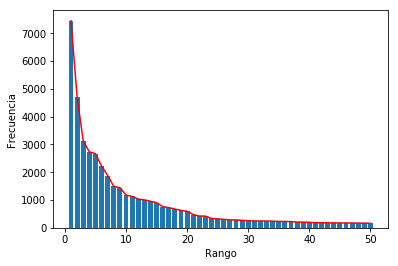

In [ ]:
import matplotlib.pyplot as plt

plt.bar(ranks[0:50], counts[0:50])
plt.plot(ranks[0:50], counts[0:50], color='r')
plt.ylabel("Frecuencia"); plt.xlabel("Rango")
plt.show()

Gráfica en escala logarítmica

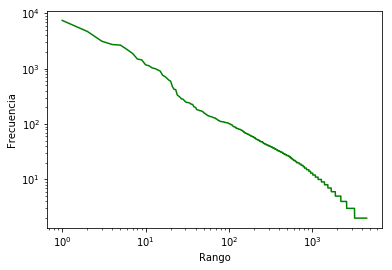

In [ ]:
plt.loglog(ranks, counts, 'g')
plt.ylabel("Frecuencia"); plt.xlabel("Rango")
plt.show()